# MTH9842 HW4
## Group L
## Yang Li, Jimmy Jusuf, Zhirong Zhang, Tiangang Zhang
## December 19, 2018

# Question.1

Let $\displaystyle{f(\mathbf{x})={-\!}\sum_{i=1}^n \log x_i}$ be the objective function, $\mathbf{x}\in \mathbb{R}^n$.

## (i)
We want to solve
$$
\min\ f(\mathbf{x}), \text{ subject to a single equality constraint } h(\mathbf{x})=\sum_{i=1}^n x_i -1 = 0
$$

Define Lagrange function

$$
L(\mathbf{x},\lambda) = f(\mathbf{x}) + \lambda\, h(\mathbf{x})
$$

Any optimal points $\mathbf{x}^*$ must satisfy KKT conditions:
\begin{align}
\nabla L_x = \nabla f(\mathbf{x}^*) + \lambda \nabla h(\mathbf{x}^*) = 0 \\
h(\mathbf{x}^*) = 0 \\
\lambda\geq 0 \\
\end{align}
We conclude
$$
\frac{\partial L}{\partial x_i} = 0 
  \Rightarrow -\frac{1}{x_i} + \lambda = 0 
  \Rightarrow x_i = \frac 1\lambda
$$
$$
h(\mathbf{x})=0 \Rightarrow \sum_{i=1}^n x_i = 1 
  \Rightarrow \sum_{i=1}^n \frac1\lambda = 1
  \Rightarrow n\frac1\lambda = 1 
  \Rightarrow \lambda = n
  \Rightarrow x_i = \frac 1n
$$

## (ii)
Given an optimization problem
$$
\begin{array}{ll}
  \text{minimize } & f(\mathbf{x})={-\!}\sum_{i=1}^n \log x_i \\
  \text{subject to } & \mathbf{Ax}-\mathbf{b}=0
\end{array}
$$
Similar to (i), define Lagrange function
$$
L(\mathbf{x},\boldsymbol\lambda) = f(\mathbf{x}) + (\mathbf{Ax} - \mathbf{b})^T\boldsymbol\lambda,
  \quad \mathbf{A}\in \mathbb{R}^{p\times n}, 
  \mathbf{b}\in\mathbb{R}^p, 
  \boldsymbol\lambda\in\mathbb{R}^p
$$

The Lagrange dual function is
$$
q(\boldsymbol\lambda) = \inf_{\mathbf{x}\in\mathcal{D}}L(\mathbf{x},\boldsymbol\lambda)
$$

Holding $\boldsymbol\lambda$ fixed, this is a convex function of $x$. The infimum with respect 
to $x$ is achieved when $\displaystyle{\frac{\partial L}{\partial x_i}}$ are zero.

Here, $A_{ji}$ is the $j$-th row, $i$-th col element in $\mathbf{A}$, $i\in 1\ldots n$
$$
\frac{\partial L}{\partial x_i} = 0 
  \Rightarrow  -\frac{1}{x_i} + \lambda_j\sum_{j=1}^p A_{ji} = 0
  \Rightarrow x_i = \frac{1}{\lambda\sum_{j=1}^p A_{ji}} = \frac{1}{(\mathbf{A}^{\!T}\boldsymbol\lambda)_i}
$$

Also we have,
$$\mathbf{Ax} = 
A\left(\begin{array}{c}\frac{1}{\lambda \sum_j A_{j1}}\\
\vdots\\
\frac{1}{\lambda \sum_j A_{jn}}\\
\end{array}\right) = 
\left(
\begin{array}{c}\sum_i\frac{ A_{1i}}{\lambda \sum_j A_{ji}}\\
\vdots\\
\sum_i\frac{ A_{ni}}{\lambda \sum_j A_{ji}}\\
\end{array}\right)
$$
Thus we have
$$
\mathbf{x}^T\mathbf{A}^{\!T}\boldsymbol\lambda = \left(
\begin{array}{c}\sum_i\frac{ A_{1i}}{\lambda \sum_j A_{ji}}&
\cdots&
\sum_i\frac{ A_{ni}}{\lambda \sum_j A_{ji}}\\
\end{array}\right)
\left(\begin{array}{cc}\lambda\\ 
\vdots\\
\lambda \end{array}\right) = n
$$
Substituting into $q(\boldsymbol\lambda)$
$$
q(\boldsymbol\lambda) = \inf_{\mathbf{x}\in\mathcal{D}}L(\mathbf{x},\boldsymbol\lambda) = 
  \inf_{\mathbf{x}\in\mathcal{D}}\left( -\!\sum_{i=1}^n \log x_i + (\mathbf{Ax} - \mathbf{b})^T\boldsymbol\lambda\right) =
  -\mathbf{b}^T\boldsymbol\lambda - \sum_{i = 1}^{n} \log\frac1{(\mathbf{A}^{\!T}\boldsymbol\lambda)_i} + n
$$
i.e. the dual problem is
$$
\text{maximize}\quad q(\boldsymbol\lambda) = -\mathbf{b}^T\boldsymbol\lambda +\sum_{i = 1}^{n} 
  \log {(\mathbf{A}^{\!T}\boldsymbol\lambda)_i} + n
$$

## (iii)
Already solved in (ii)

## (iv)
By Newton's method, we need to calculate the matrix equation
$$
\begin{bmatrix}
\nabla^2 f &A^T\\
A& 0
\end{bmatrix}
\begin{bmatrix}
-\Delta x\\
\lambda
\end{bmatrix}
=
\begin{bmatrix}
-\nabla f(x)\\
0
\end{bmatrix}
$$
It's easy to see that 

$$
\nabla f = (-\frac{1}{x_1},\cdots, -\frac{1}{x_n})^T
$$

$$
\nabla^2 f = \operatorname{diag}(\frac{1}{x_1^2},\cdots, \frac{1}{x_n^2})
$$

## (v)
To solve the dual problem, we use the following formula for gradient and hessian of
$q(\boldsymbol\lambda)$.

$$
\nabla_{\!\lambda}\,q=-\mathbf{b}+\mathbf{A}y \text{ where }
  y=(1/(\mathbf{A}^{\!T}\boldsymbol\lambda)_1,\ldots,
  1/(\mathbf{A}^{\!T}\boldsymbol\lambda)_n) \\
\nabla^2_{\!\lambda}\,q=-\mathbf{ADA}^{\!T}, \quad D \text{ is diagonal, with }
  D_{ii}=(\mathbf{A}^{\!T}\boldsymbol\lambda)_i^{-2}
$$

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from numpy.linalg import inv

# global variables to keep track of search history
x_hist = []
fx_hist = []  # objective function value
dfx_hist = []  # derivative of objective function / gradient vector at x
hfx_hist = []  # second derivative of objective function / hessian matrix at x
dx_hist = []  # Newton step / search direction
epsilon_hist = []

In [2]:
def vect(a):
    # turn input into a column vector, i.e. a.shape=(numrow,1)
    if isvect(a): return a  # do nothing if input is already a vector       
    av=np.array(a)[:,None]
    #print(av.shape)
    assert av.shape==(len(a),1)
    return av

def isvect(x):
    # check if x is a vect
    try:
        assert isinstance(x, np.ndarray)
        if (x.ndim!=2): return False
        (nr,nc) = x.shape
        return nc==1
    except:
        return False

def sumcol(v):
    # input is a vector (assume column vector, but works with row vector too)
    # return the sum of elements
    assert isinstance(v, np.ndarray)
    return np.sum(v)

In [3]:
a=vect([1,2,3])
b=np.array([4,5,6])
print(isvect(a), isvect(b)) # output: True False

True False


In [4]:
# IGNORE THIS
# Newton method for unconstrained problem
def NewtonUnconstrainedSolver(x0, alpha, beta, tol, objfun, objfun_grad, objfun_hess):
    assert np.isscalar(alpha) and np.isscalar(beta) and np.isscalar(tol)
    epsilon =  100 # get the Newton decrement
    gradtol = 1e-5
    count = 0
    x = x0
    while epsilon > tol and count < 500:      
        count = count + 1
        funcval, gradvec, hessmat = objfun(x), objfun_grad(x), objfun_hess(x)
        print("x=", x, "\nf(x)=", funcval, "\ngrad(f(x))", gradvec, "\nhess(f(x))", hessmat)
        newton_step = -1*np.matmul(np.linalg.inv(hessmat), gradvec)
        print("newton_step", newton_step)
        descmag = np.squeeze(gradvec.T.dot(newton_step)) # check descent magnitude
        print("descent magnitude", descmag)
        # using backtracking line search
        back_ct=0
        t = 1
        # while -np.log(x + t * dx).sum() >= -np.log(x).sum() - alpha * t * dfx.T.dot(dx):
        while True:
            new_x = x+t*newton_step
            print("new_x", new_x)
            new_funcval = objfun(new_x)
            print(new_funcval, alpha, t, descmag)
            if new_funcval < (funcval-alpha*t*descmag): break
            t = t * beta
            back_ct+=1
            if back_ct>50: break
        if (abs(descmag)<gradtol): break
        # update the parameters
        last_x=x
        x = new_x
        fnew, gradvec, hessmat = new_funcval, objfun_grad(x), objfun_hess(x)
        # epsilon =  2*np.sqrt(-np.log(last_x).sum()+np.log(x).sum())
        epsilon =  2*np.sqrt(objfun(last_x)-objfun(x))
    return x,epsilon,count

In [5]:
# IGNORE THIS
# class
class NewtonSolver:
    # Class attribute
    objfunc_val = 0;
    gradvec = 0;
    hess = 0;

    # Initializer / Instance attributes
    def __init__(self):
        None

    # instance method
    def objfunc(self, x):
        return "{} is {} years old".format(self.name, self.age)

    def grad(self, x):
        return "{} says {}".format(self.name, sound)

In [6]:
# IGNORE THIS
# dual function optimizer
def nmdual(x0, A, b, alpha, beta, tol):
    def func(x):
        # implement the dual function
        (nr,nc) = A.shape
        atl=np.matmul(A.T,x)
        sumlog = sumcol(np.log(x))
        return -1*(-np.dot(b.T,x)+sumlog+nc)
    def grad(x):
        # return the gradient of objective function
        g=np.matmul(A, inv(np.matmul(A.T,x)))
        return -1*(vect(-b)+g)
    def hess(x):
        # return the hessian of the objective function
        atl=np.matmul(A.T,x)
        atlinv=inv(atl)
        Dii=np.diag(atlinv**2)
        D=np.diag(np.matmul(A.T,x))
        return -1*((-A @ D) @ A.T)
    # compute A' lambda
    #atl=np.matmul(A.T,x0)
    #atlinv=inv(atl)
    #Dii=np.diag(atlinv**2)
    return NewtonUnconstrainedSolver(x0, alpha, beta, tol, func, grad, hess)

In [7]:
# IGNORE THIS
# test code for Newton unconstrained optimization problem
def nmprimal(x0, alpha, beta, tol):
    def func(x):
        # implement objective function f(x) = -sum(log(x_i))
        return sumcol(-np.log(x))
    def grad(x):
        # evaluate the gradient of objective function at point x
        return vect(-1/x)
    def hess(x):
        # evaluate the hessian of the objective function at point x
        return np.diagflat(1/x**2)
    return NewtonUnconstrainedSolver(x0, alpha, beta, tol, func, grad, hess)

In [8]:
alpha = 0.1
beta = 0.5
tol = 0.0001
x0=vect([0.1,0.4,0.3])
A=np.hstack((vect([1,1,1]),vect([2,2,2]),vect([3,3,3])))
b=vect([1,1,1])
#nmdual(x0,alpha,beta,tol)

In [9]:
def NewtonMethod(A, x0, alpha, beta, tol):
    """
    Implement Newton's method optimization with equality constraints.
    Input:
      A is the coefficient of the matrix that represents equality constraint (Ax-b)=0
      alpha, beta are parameters for backtracking line search
      tol, the algorithm terminates if |f(x)-f(last_x)| < tol
      Function f(), f_grad(), f_hess() represent the objective function to be minimized,
        the gradient and the hessian
    Output:
      x where the minimum is found
      epsilon the value of |f(x)-f(last_x)| from the final iteration
      count, the number of iterations
    """
    def f(x):
        # evaluate objective function at x
        return -np.log(x).sum()
    def f_grad(x):
        # return the gradient vector at f(x)
        return -1 / x
    def f_hess(x):
        # return the hessian matrix at f(x)
        return np.diag(1/x**2)
    (row, col) = A.shape
    x = x0
    H = f_hess(x) # H is hessian of f(x)
    upper = np.column_stack((H, A.T)) # [Hessian, A^T]
    lower = np.column_stack((A, np.zeros((row, row)))) # [A, 0]
    KKT = np.row_stack((upper, lower)) # this the the matrix on the left
    dfx = f_grad(x) # this is - nabla f(x)
    RHS = np.append(dfx, np.zeros(row)) # right hand side
    epsilon =  100 # get the Newton decrement
    count = 0
    # clear search history
    x_hist.clear()
    fx_hist.clear()  # objective function value
    dfx_hist.clear()  # derivative of objective function / gradient vector at x
    hfx_hist.clear()  # second derivative of objective function / hessian matrix at x
    dx_hist.clear()  # Newton step / search direction
    epsilon_hist.clear()
    while epsilon > tol and count < 500:
        
        count = count + 1
        # save the search paths
        x_hist.append(x)
        fx_hist.append(f(x))
        dfx_hist.append(dfx)
        hfx_hist.append(H)
        
        LHS = np.squeeze(np.array(inv(KKT).dot(RHS)))
        dx = -np.array(LHS)[:col]; dx_hist.append(dx)
        t = 1
        # using backtracking line search
        back_ct=0
        fval = f(x)
        print(fval)
        while f(x + t * dx) >= fval - alpha * t * dfx.T.dot(dx):
            t = t * beta
            back_ct+=1
            if back_ct>50:
                break
        # update the parameters
        last_x=x
        x = x + t * dx
        H = f_hess(x)
        upper = np.column_stack((H, A.T))
        lower = np.column_stack((A, np.zeros((row, row))))
        KKT = np.row_stack((upper, lower))
        dfx = f_grad(x)
        RHS = np.append(dfx, np.zeros(row))
        epsilon =  abs(f(last_x) - f(x)); epsilon_hist.append(epsilon)
        #print(dfx.T.dot(dx))
    return x,epsilon,count

In [10]:
# IGNORE THIS
def NewtonMethodDual(A, b, x0, alpha, beta, tol):
    """
    Implement Newton's method optimization with equality constraints.
    Input:
      A is the coefficient of the matrix that represents equality constraint (Ax-b)=0
      alpha, beta are parameters for backtracking line search
      tol, the algorithm terminates if |f(x)-f(last_x)| < tol
      Function f(), f_grad(), f_hess() represent the objective function to be minimized,
        the gradient and the hessian
    Output:
      x where the minimum is found
      epsilon the value of |f(x)-f(last_x)| from the final iteration
      count, the number of iterations
    """
    def f(x):
        """ evaluate objective function at x """
        atx = A.T @ x
        btxm = -b.T @ x
        n = len(atx)
        return flipsign*(btxm+np.log(atx).sum()+n)
    def f_grad(x):
        """ return the gradient vector at f(x) """
        atx = A.T @ x
        y = 1/atx
        Ay = A @ y
        return flipsign*(-b+Ay)
    def f_hess(x):
        """ return the hessian matrix at f(x) """
        atx = A.T @ x
        y = 1/atx**2
        D = np.diagflat(y)
        ADAm = -A @ D @ A.T
        return flipsign*(ADAm)
    
    flipsign = -1
    (row, col) = A.shape
    x = x0
    H = f_hess(x) # H is hessian of f(x)
    upper = np.column_stack((H, A.T)) # [Hessian, A^T]
    lower = np.column_stack((A, np.zeros((row, row)))) # [A, 0]
    KKT = np.row_stack((upper, lower)) # this the the matrix on the left
    dfx = f_grad(x) # this is - nabla f(x)
    RHS = np.append(dfx, np.zeros(row)) # right hand side
    epsilon =  100 # get the Newton decrement
    count = 0
    # clear search history
    x_hist.clear()
    fx_hist.clear()  # objective function value
    dfx_hist.clear()  # derivative of objective function / gradient vector at x
    hfx_hist.clear()  # second derivative of objective function / hessian matrix at x
    dx_hist.clear()  # Newton step / search direction
    epsilon_hist.clear()
    while epsilon > tol and count < 500:
        
        count = count + 1
        # save the search paths
        x_hist.append(x)
        fx_hist.append(f(x))
        dfx_hist.append(dfx)
        hfx_hist.append(H)
        
        LHS = np.squeeze(np.array(inv(KKT).dot(RHS)))
        dx = -np.array(LHS)[:col]; dx_hist.append(dx)
        t = 1
        # using backtracking line search
        back_ct=0
        fval = f(x)
        while f(x + t * dx) >= fval - alpha * t * dfx.T.dot(dx):
            t = t * beta
            back_ct+=1
            if back_ct>50:
                break
        # update the parameters
        last_x=x
        x = x + t * dx
        H = f_hess(x)
        upper = np.column_stack((H, A.T))
        lower = np.column_stack((A, np.zeros((row, row))))
        KKT = np.row_stack((upper, lower))
        dfx = f_grad(x)
        RHS = np.append(dfx, np.zeros(row))
        epsilon =  abs(f(last_x) - f(x)); epsilon_hist.append(epsilon)
        #print(dfx.T.dot(dx))
    return x,epsilon,count

In [11]:
# alpha = 0.1
# beta = 0.5
# tol = 1e-12
# A=np.array([[1,1,1,1,1]]) # define 1x5 matrix (p=1, n=5), single constraint sum(x_i)=1
# b=vect([1])
# x=np.array([2,2,2,2,2])
# atx=A.T @ l
# y=1/atx**2
# D=np.diagflat(y)
# -A @ D @ A.T
# #NewtonMethodDual(A, b, l, alpha, beta, tol)
# NewtonMethod(A, x, alpha, beta, tol)

In [12]:
alpha = 0.1
beta = 0.5
tol = 1e-12

In [13]:
# test with a small test case
# n=3 (dimension)
# p=1 (constrain sum(x_i)=1)
# x0 must start in the feasible set
x0=np.array([0.2,0.5,0.3])  # note the element-sum of x0 is 1
A=np.array([[1,1,1]])
b=np.array([[1]])

In [14]:
%%time
NewtonMethod(A, x0, alpha, beta, tol)

3.506557897319982
3.3072267512534124
3.2958912736500254
3.295836866997819
3.29583686600433
Wall time: 15.6 ms


(array([0.33333333, 0.33333333, 0.33333333]), 4.440892098500626e-16, 5)

In [15]:
x_hist

[array([0.2, 0.5, 0.3]),
 array([0.29473684, 0.34210526, 0.36315789]),
 array([0.3307705 , 0.33567068, 0.33355882]),
 array([0.33332553, 0.3333292 , 0.33334528]),
 array([0.33333333, 0.33333333, 0.33333333])]

In [16]:
# note the constraint sum(x_i)=1 holds at all times during the search
[sum(x) for x in x_hist]

[1.0, 1.0, 1.0, 1.0, 0.9999999999999998]

0    1.993311e-01
1    1.133548e-02
2    5.440665e-05
3    9.934888e-10
4    4.440892e-16
dtype: float64

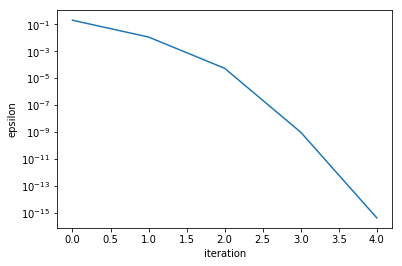

In [17]:
ts=pd.Series(epsilon_hist)
plt=ts.plot(logy=True)
plt.set_xlabel('iteration')
plt.set_ylabel('epsilon')
ts

In [18]:
# compute l1-norm of x_hist[0] with every elem of x_hist[0..n]
# the output should be practically zero since the algorithm ensures x stays feasible during the search
[sum(A@(x_hist[0] - x)) for x in x_hist]

[0.0, 0.0, 0.0, 1.1102230246251565e-16, 2.220446049250313e-16]

In [19]:
A1 = np.array([1 for i in range(500)])

In [20]:
def cst(j,i):
    if j==i-1 or j==i:
        return 1
    else:
        return 0

In [21]:
A2=np.array([[cst(j,i) for j in range(500)] for i in range(1,100)])

In [22]:
A=np.row_stack((A1,A2))

In [23]:
A

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
x0 = np.array([0.5*i+1 for i in range(500)])

In [25]:
x0

array([  1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,   5. ,
         5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,
        10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,  14. ,
        14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,  18.5,
        19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,  23. ,
        23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,  27.5,
        28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,  31.5,  32. ,
        32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,  36. ,  36.5,
        37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,  40.5,  41. ,
        41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,  45. ,  45.5,
        46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,  49.5,  50. ,
        50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,  54. ,  54.5,
        55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,  58.5,  59. ,
        59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,  63. ,  63.5,
        64. ,  64.5,

In [26]:
%%time
#res=NewtonMethod(A, x0, a, b, tol)
NewtonMethod(A, x0, alpha, beta, tol)

-2270.9734742812684
-2300.0694120185362
-2305.033144809954
-2305.3592866667277
-2305.363440559174
-2305.3634422023033
Wall time: 234 ms


(array([  1.25,   1.25,   2.25,   2.25,   3.25,   3.25,   4.25,   4.25,
          5.25,   5.25,   6.25,   6.25,   7.25,   7.25,   8.25,   8.25,
          9.25,   9.25,  10.25,  10.25,  11.25,  11.25,  12.25,  12.25,
         13.25,  13.25,  14.25,  14.25,  15.25,  15.25,  16.25,  16.25,
         17.25,  17.25,  18.25,  18.25,  19.25,  19.25,  20.25,  20.25,
         21.25,  21.25,  22.25,  22.25,  23.25,  23.25,  24.25,  24.25,
         25.25,  25.25,  26.25,  26.25,  27.25,  27.25,  28.25,  28.25,
         29.25,  29.25,  30.25,  30.25,  31.25,  31.25,  32.25,  32.25,
         33.25,  33.25,  34.25,  34.25,  35.25,  35.25,  36.25,  36.25,
         37.25,  37.25,  38.25,  38.25,  39.25,  39.25,  40.25,  40.25,
         41.25,  41.25,  42.25,  42.25,  43.25,  43.25,  44.25,  44.25,
         45.25,  45.25,  46.25,  46.25,  47.25,  47.25,  48.25,  48.25,
         49.25,  49.25,  50.25,  50.25, 150.75, 150.75, 150.75, 150.75,
        150.75, 150.75, 150.75, 150.75, 150.75, 150.75, 150.75, 

0    2.909594e+01
1    4.963733e+00
2    3.261419e-01
3    4.153892e-03
4    1.643130e-06
5    4.547474e-13
dtype: float64

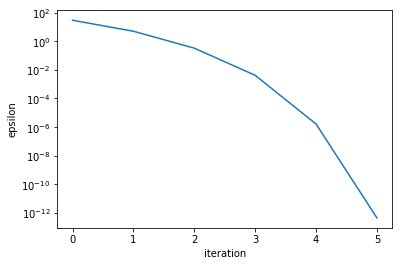

In [27]:
ts=pd.Series(epsilon_hist)
plt=ts.plot(logy=True)
plt.set_xlabel('iteration')
plt.set_ylabel('epsilon')
ts

In [28]:
# to show the algorithm enforces the constraints correctly,
# we show l1-norm of x_hist[0] with every elem of x_hist[0..n] are zero
[sum(A@(x_hist[0] - x)) for x in x_hist]

[0.0,
 3.099076550938662e-12,
 5.9821037012852685e-12,
 2.2035706592760107e-12,
 1.0793810290010697e-11,
 1.5482060078397808e-11]

# Question.2

## (a)

First, show the equivelent between these 4 conditions.
___
* Condition 1 is equivalent to Condition 2

Condition 1 $\rightarrow$ Condition 2

Suppose $x \in \mathcal N(A) \cap \mathcal N(H)$ and $x \neq 0$. In condition 2, we have  $Ax = 0\, x \neq 0$. Since $x \in \mathcal N(A) \cap \mathcal N(H)$, we have $x^THx = 0$, this contradict to to second statement.

Condition 2 $\rightarrow$ Condition 1

If there is an $x$ s.t. $Ax = 0\, x \neq 0, x^THX = 0$. Because $H$ is semipositive definate, we must have $Hx = 0$, i.e.   $x \in \mathcal N(A) \cap \mathcal N(H)$
___
* Condition 2 is equivalent to Condition 3

If $Ax = 0, x \neq 0$, then because $\mathcal R(F) = \mathcal N (A)$, we have $x = Fz$ and $z \neq 0$. Then because of 2 we have $x^T Hx = z^TF^THFZ > 0$

___
* Condition 2 is equivalent to Condition 4
If we have the condition 2. then 

$$
x^T(H + A^TA) = x^THx + \vert\vert A^Tx\vert\vert^2_2 > 0
$$
for all nonzero x, sot the condition 4 holds for $Q = I$.
If the fourth condition hols with general semipositive definate form of $Q$.
$$
x^T(H + A^TQA) = x^THx + x^TA^TQAx > 0
$$
for all nonzero $x$, Therefore if $Ax = 0\, x \neq 0$, we must have $x\neq 0$
___
Second show these four conditions are equivalent to nonsigularity of KKT matrix.

Suppose $x\neq 0$, s.t.$Ax = 0, Hx = 0$
$$
\begin{bmatrix}
H & A^T\\
A & 0
\end{bmatrix}
\begin{bmatrix}
x\\
0
\end{bmatrix} = 0$$

If the KKT matrix is singular, $x,z$ are not both zero, and we have
$$
\begin{bmatrix}
H & A^T\\
A & 0
\end{bmatrix}
\begin{bmatrix}
x\\
z
\end{bmatrix} = 0$$

This leads to $Hx + A^Tz = 0$, and $Ax = 0$. 
from the first equation, we have 
$$
x^THx + x^TA^Tz = 0.
$$
plug in the second equation.
we have $x^THx = 0$, this contradicts second condition unless $x= 0$.

## (b)
From previous question, we have $H + A^TA$ is positive definate matrix. Then we must hvae $R \in \mathbb R^{n\times n}$, s.t.
$$
R^T(H + A^TA)R = I
$$
Apply SVD to $AR$, $AR = U\Sigma V_1^T$, where $\Sigma = diag(\sigma_1,\cdots, \sigma_p)$. Denote $V_2 \in \mathbb R^{n\times(n-p)}$, s.t.
$$
V = \left[V_1\quad V_2\right]
$$
$V_2$ is orthogonal, and let 
$$
S = \left[\Sigma\quad 0\right] \in \mathbb R^{p\times n}
$$
We have $AR = USV^T$, then 
$$
V^TR^T(H + A^TA)RV = V^TR^THRV + S^TS = I
$$
Becasue $V^TR^THRV = I - S^TS$ is diagonal matrix, then denote it as $D$
$$
D = V^TR^THRV = diag(1-\sigma_1^2, \cdots, 1-\sigma_p^2, 1, \cdots, 1)
$$
Apply the transform to KKT matrix, we have

$$
\begin{bmatrix}
V^TR^T & 0\\
0 & U
\end{bmatrix}
\begin{bmatrix}
H & A^T\\
A & 0
\end{bmatrix}
\begin{bmatrix}
RV & 0\\
0 & U
\end{bmatrix}
=
\begin{bmatrix}
D & S^T\\
S & 0
\end{bmatrix}
$$
Apply the permutation to hte matrix on the right gives a block diaonal matrix with n diagonal blocks.
$$
\begin{bmatrix}
\lambda_i & \sigma_i\\
\sigma_i & 0
\end{bmatrix}
$$
where $i = 1,2,\cdots, p$, 

and $\lambda_i = 1$ for $i = p +1, \cdots, n$

This matrix have eiggenvalues of $\frac{\lambda_i \pm \sqrt{\lambda_i^2 + 4\sigma_i^2}}{2}$, i.e. one eigen value is positive, another is negative. 

In total, there are n positive evalues and p negative evalues.